<a href="https://colab.research.google.com/github/LPRJ0/Ciencias/blob/main/Dist_inf_y__Poisson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribuciones infinitamente divisibles y el teorema límite de Poisson

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />Esta obra está bajo una <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Licencia Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional</a>.


**Autores del texto: Josué Manik Nava Sedeño y María Clara Fittipaldi. Autores del material interactivo: Ariadna Margarita Vargas Bautista y Abraham Martínez López. Facultad de Ciencias, UNAM, 2021. 
Contacto con los responsables del proyecto: manikns@ciencias.unam.mx mcfittipaldi@ciencias.unam.mx**

Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE102121 "Recursos para el aprendizaje de la Transformada de Fourier y su interpretación como la Función Característica de una distribución de probabilidad".

**Importante:** En caso de que, al ejecutar el recurso, aparezca algún mensaje de advertencia, favor de seleccionar "Ejecutar de todos modos''.

# 1. Distribuciones Infinitamente Divisibles
La distribución de una variable aleatoria $Y$ se dice *infinitamente divisible* si para cada $n\in\mathbb{N}$ existen $n$ variables aleatorias independientes e idénticamente distribuidas $X_{k_1},X_{k_2},\ldots,X_{k_n}$  tales que 
$$Y\overset{\mathcal{D}}{=}X_1+X_2+\ldots+X_n,$$ 
es decir, ambas variables son iguales en distribución.

Si $Y$ tiene una distribución infinitamente divisible, se dice que su función característica $\phi_Y(t)=\mathbb{E}[e^{itY}]$ es una *función característica infinitamente divisible*, es decir para cada $n \in \mathbb{N}$ existe una función característica $\varphi_n(t)$ tal que  
$$\phi_Y(t)=\phi_{X_{k_1}}(t)\cdots\phi_{X_{k_n}}(t)=[\varphi_n(t)]^n.$$

A continuación agregamos librerías y funciones útiles para el resto del material interactivo.

In [ ]:
#librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, special
from sympy import *

In [ ]:
#método para graficar funciones en el plano complejo
#código tomado del trabajo de Abraham Martínez
def plot_cf(resultados, titulo="Plano Complejo"):
    parte_real=[np.real(r) for r in resultados]
    parte_imag=[np.imag(r) for r in resultados]
    
    fig, ax=plt.subplots()
    ax.plot(parte_real,parte_imag)
    
    ax.set(xlabel='Parte Real', ylabel='Parte Imaginaria',
       title=titulo)
    ax.grid()
    
    ax.spines['right'].set_position('zero')
    ax.spines['left'].set_color('none')
    ax.yaxis.tick_left()
    ax.spines['top'].set_position('zero')
    ax.spines['bottom'].set_color('none')
    ax.xaxis.tick_bottom()
    
    plt.show()

**Nota.** En estos ejemplos se puede ver que muchas veces las aproximaciones no presentan las mismas características que la función a la que deseamos acercarnos. En estos casos, las simulaciones presentan picos, aún cuando la función característica correspondiente es una función derivable o suave en todo punto. Para obtener mejores resultados aproximación, podemos probar modificando los valores en los que discretizamos a nuestra variable $t$, en los cuales se evalúan las funciones características, (cambiando el intervalo $(-k,k)$ o el número de elementos discretos `num` de la variable `intervalo` a continuación), o cambiando la elección de parámetros. 

In [ ]:
#intervalo de abscisas donde evaluar las funciones características
intervalo=np.linspace(-20,20, num=50000)

#número entero que "divide" a la distribución
m=5

## Ejemplos de distribuciones infinitamente divisibles

Hay muchas familias de distribuciones conocidas que tienen la propiedad de ser infinitamente divisibles. Revisaremos algunas a continuación.

### Distribuciones discretas
**Distribución de Poisson.** Sea $Y\sim \mathrm{Poi}(\lambda)$, con función de probabilidad puntual 
$$p(k)=\frac{e^{-\lambda}\lambda^k}{k!}, \qquad k \in \mathbb{N}_0.$$
Para $n\in\mathbb{N}$, si definimos $X_1,X_2,\ldots,X_n$ variables aleatorias i.i.d. con $X_i \sim \mathrm{Poi}(\lambda/n)$ se cumple que  $Y\overset{\mathcal{D}}{=}X_1+X_2+\ldots+X_n$.

Las funciones características son entonces de la forma
$$\phi_Y(t)=\exp\Bigg[ \lambda \left(e^{it}-1\right) \Bigg] \qquad \text{y} \qquad \varphi_n(t)=\varphi_{X_i}(t)=\exp\Bigg[\frac{\lambda}{n}\left(e^{it}-1\right)\Bigg],$$ por lo que $\varphi_n(t)=\Big[ \phi_Y(t) \Big]^{1/n}$.

A continuación presentamos gráficas de las funciones características de $Y$ y $X_i$.

#### Elección de parámetros 

In [ ]:
#parámetro lambda
lamb=10

In [ ]:
#función característica de Poisson
def cf_Poisson(t,l,n=1):
    t=np.asarray(t)
    return np.exp((l/n)*(np.exp(1j*t)-1))

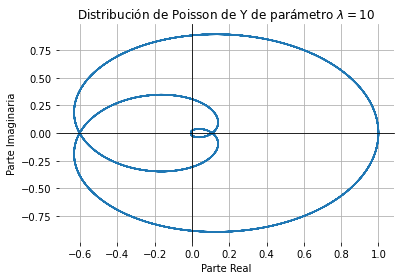

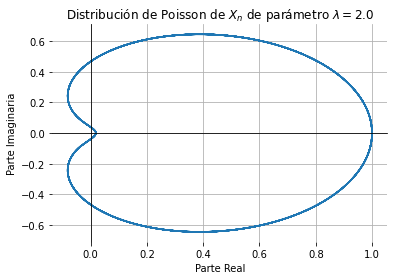

In [ ]:
#evaluar la función característica de arriba
res  = [cf_Poisson(t,l=lamb) for t in intervalo]
resm = [cf_Poisson(t,l=lamb,n=m) for t in intervalo]

plot_cf(res,titulo='Distribución de Poisson de Y de parámetro $\lambda=$'+str(lamb))
plot_cf(resm, titulo='Distribución de Poisson de $X_n$ de parámetro $\lambda=$'+str(lamb/m))

**Distribución Binomial Negativa.** Sea  $Y\sim\mathrm{BinNeg}(r,p)$, donde $r\in\mathbb{R}$ es el parámetro para el número de fracasos hasta que el experimento se detenga y $p\in[0,1]$ es la probabilidad de éxito en cada ensayo de Bernoulli. Su funcion de probabilidad está dada por
$$f_{Y}(k)={r+k-1 \choose x}p^{r}(1-p)^{k}, \qquad k \in \mathbb{N}_0 $$

Si $n\in \mathbb{N}$, dadas $X_1,X_2,\ldots,X_n$ variables aleatorias i.i.d. con $X_i\sim\mathrm{BinNeg}(r/n,p)$, se tiene que 
$$X_1+X_2+\ldots+X_n \overset{\mathcal{D}}{=}Y.$$

En este caso las funciones características están dadas $\phi_Y(t)=\Bigg[ \frac{1-p}{1-pe^{it}} \Bigg]^r$ y
$\varphi_n(t)=\Bigg[ \frac{1-p}{1-pe^{it}} \Bigg]^{r/n}$.

Las funciones características de las variables aleatorias $Y$ y $X_n$ se muestran a continuación.

#### Elección de parámetros


In [ ]:
#Parámetro r de la distribución Binomial Negativa:
r=10

#parámetro p:
p=0.7

In [ ]:
#función característica:
def cf_BinNeg(t,r,p,n=1):
    t=np.asarray(t)
    return ((1-p)/(1-(p*np.exp(1j*t))))**(r/n)

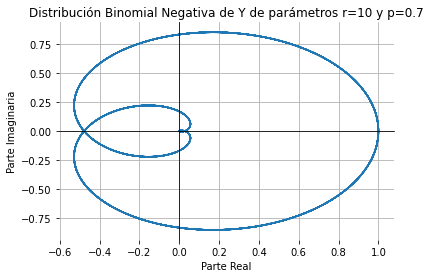

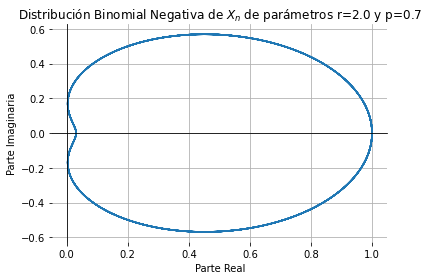

In [ ]:
#evaluar la función característica
res  = [cf_BinNeg(t,r,p) for t in intervalo]
resm = [cf_BinNeg(t,r,p,n=m) for t in intervalo]

plot_cf(res,titulo='Distribución Binomial Negativa de Y de parámetros r='+str(r)+" y p="+str(p))
plot_cf(resm, titulo='Distribución Binomial Negativa de $X_n$ de parámetros r='+str(r/m)+" y p="+str(p))

### Distribuciones continuas

**Distribución Normal.** Si $Y\sim\mathcal{N}(\mu,\sigma^2)$, para $n\in\mathbb{N}$ existen variables aleatorias i.i.d. $X_1,X_2,\ldots,X_n$, con $X_i \sim \mathcal{N}(\mu/n,\sigma^2/n)$, tales que 
$$X_1+X_2+\ldots+X_n \overset{\mathcal{D}}{=}Y.$$

La función característica de $Y$ y $X_i$ están dadas por $\phi_Y(t)=\exp\Bigg[ it\mu - \frac{1}{2}\sigma^2 t^2 \Bigg]$ y  $\varphi_n(t)=\exp\Bigg[ it\frac{\mu}{n} - \frac{1}{2}\frac{\sigma^2}{n} t^2 \Bigg]$, respectivamente.

#### Elección de parámetros

In [ ]:
#parámetros de la distribución normal:
#media
mu=10
#varianza
sigma=1

In [ ]:
def cf_Normal(t,mu=0,sigma=1,n=1):
    t=np.asarray(t)
    return np.exp(1j*t*(mu/n) - 0.5*(t**2)*((sigma**2)/n))

In [ ]:
resm = [cf_Normal(t,mu,sigma,n=m) for t in intervalo]
res = [cf_Normal(t,mu,sigma) for t in intervalo]

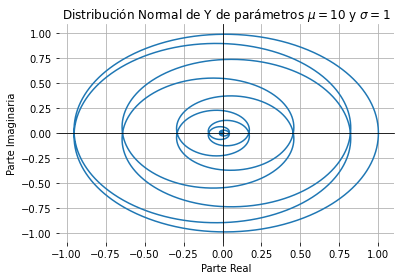

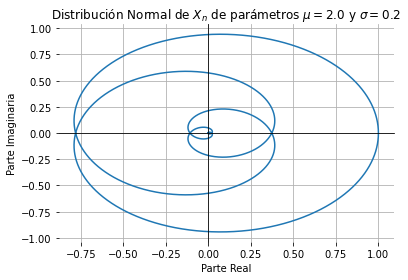

In [ ]:
plot_cf(res,titulo='Distribución Normal de Y de parámetros $\mu=$'+str(mu) + ' y $\sigma=$'+str(sigma))
plot_cf(resm, titulo='Distribución Normal de $X_n$ de parámetros $\mu=$'+str(mu/m) + ' y $\sigma=$'+str(sigma/m))

**Distribución de Cauchy.** Sea $Y\sim\mathrm{Cauchy}(a,b)$, donde $a\in\mathbb{R}$ es el parámetro de localización y $b\in(0,\infty)$ es el parámetro de escalamiento. Para $n\geq1$, $\{X_i\}_{i=1}^n$ es una colección de variables i.i.d. con $X_i \sim \mathrm{Cauchy}(\frac{a}{n},\frac{b}{n})$, que satisface
$$Y\overset{\mathcal{D}}{=}X_1+X_2+\ldots+X_n.$$
Las funciones características respectivas están dadas por $ \phi_Y(t)=\exp\Bigg[ ait-b|t| \Bigg]$ y $ \varphi_n(t)=\exp\Bigg[ \frac{a}{n}it-\frac{b}{n}|t| \Bigg]$.

#### Elección de parámetros

In [ ]:
#parámetro de localización
a=5

#parámetro de escalamiento:
b=1

In [ ]:
def cf_Cauchy(t,a,b,n=1):
    t=np.asarray(t)
    return np.exp(((a/n)*1j*t)-((b/n)*np.abs(t)))

In [ ]:
resm = [cf_Cauchy(t,a,b,n=m) for t in intervalo]
res = [cf_Cauchy(t,a,b) for t in intervalo]

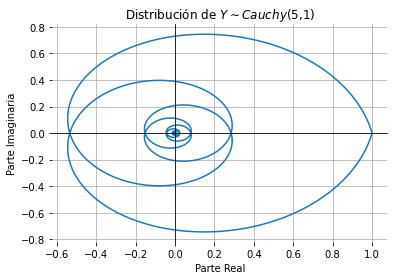

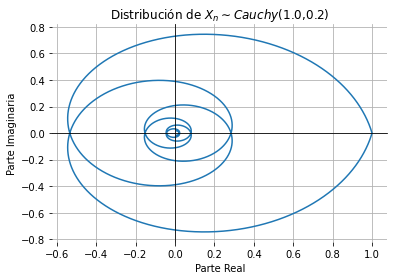

In [ ]:
plot_cf(res,titulo='Distribución de $Y\sim Cauchy($'+str(a)+','+str(b)+'$)$')
plot_cf(resm, titulo='Distribución de $X_n\sim Cauchy($'+str(a/m)+','+str(b/m)+'$)$')

**Distribución Gamma.** Sea $Y\sim\Gamma(k,b)$ donde $k\in(0,\infty)$ es el parámetro de forma y $b\in(0,\infty)$ el parámetro de escalamiento, es decir $Y$ tiene función de densidad
$$f(y)={\frac {b (b y)^{k-1}e^{-b y}}{\Gamma (k )}}, \qquad y \geq 0 ,$$
donde
$\Gamma(k ) = ∫_0^\infty u^{k-1} e^{ -u} du$ es la función _gamma_
Para $n\in \mathbb{N}$ se tiene que dadas $\{X_i\}_{i=1}^n$ una familia de variables i.i.d. con $X_i\sim(\frac{k}{n},b)$, entonces
$$ X_1+X_2+\ldots+X_n\overset{\mathcal{D}}{=}Y,$$

Las funciones características respectivas son $\phi_Y(t)=\Bigg[ 1-\frac{it}{b} \Bigg]^{-k}$ y $\varphi_n(t)=\Bigg[ 1-\frac{it}{b} \Bigg]^{-k/n}$

#### Elección de parámetros 

In [ ]:
#parámetro de forma
k=10
#parámetro de escalamiento
b=1

In [ ]:
#función característica
def cf_Gamma(t,b,k,n=1):
    t=np.asarray(t)
    return(1-(1j*t)/b)**(-k/n)

In [ ]:
resm = [cf_Gamma(t,b,k,n=m) for t in intervalo]
res = [cf_Gamma(t,b,k) for t in intervalo]

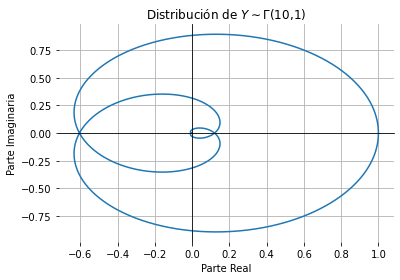

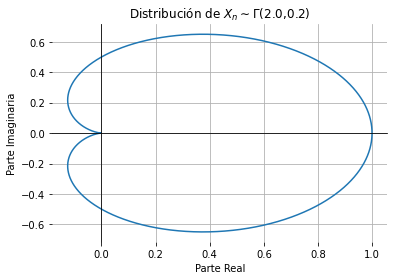

In [ ]:
plot_cf(res,titulo='Distribución de $Y\sim\Gamma($'+str(k)+','+str(b)+')')
plot_cf(resm, titulo='Distribución de $X_n\sim\Gamma($'+str(k/m)+','+str(b/m)+')')

**Distribución** $\chi^2$. Sea $Y\sim\chi^2(k)$ con $k\in\mathbb{N}^+$ el parámetro de los grados de libertad, para $n\geq1$, con densidad
$$ f(y)={\frac {\left({\frac {1}{2}}\right)^{\frac {k}{2}}}{\Gamma \left({\frac {k}{2}}\right)}}\,y^{{\frac {k}{2}}-1}e^{-y/2}, \qquad y>0.$$
Se tiene que $Y\overset{\mathcal{D}}{=}X_1+X_2+\ldots+X_n,$ dónde $X_1,X_2,\cdots,X_n$ son variables aleatorias i.i.d. con $X_i\sim(k/n)$.

Sus funciones características respectivas están dadas por $\phi_Y(t)=\Bigg[ 1-2it \Bigg]^{-k/2}$ y $\varphi_n(t)=\Bigg[ 1-2it \Bigg]^{\frac{-k}{2n}}$


#### Ajuste de parámetros

In [ ]:
#grados de libertad
k=20

In [ ]:
def cf_ChiSqd(t,k,n=1):
    t=np.asarray(t)
    return (1-2*1j*t)**(-k/(2*n))

In [ ]:
resm = [cf_ChiSqd(t,k,n=m) for t in intervalo]
res = [cf_ChiSqd(t,k) for t in intervalo]

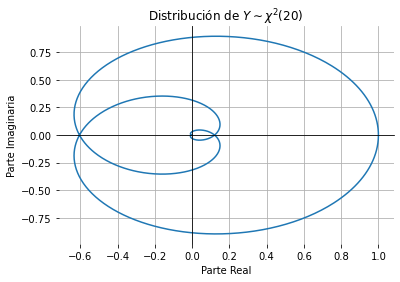

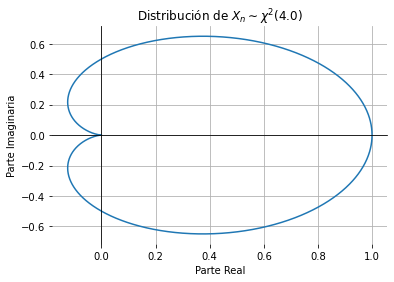

In [ ]:
plot_cf(res,titulo='Distribución de $Y\sim\chi^2($'+str(k)+')')
plot_cf(resm, titulo='Distribución de $X_n\sim\chi^2($'+str(k/m)+')')

# 2. Teorema Límite de Poisson
El Teorema Límite de Poisson relaciona a la distribución binomial con la distribución de Poisson, demostrando que una distribución Poisson de parámetro $\lambda=np$ es el límite al que tiende las distribuciones $\mathrm{Bin}(n,p)$ (que cuenta las observaciones exitosas de un experimento) cuando $n$ tiende a infinito. Esto es de gran utilidad para generar variables aleatorias Poisson númericamente de manera aproximada, y también para realizar estimaciones numéricas sobre variables aleatorias Poisson de manera eficiente.

**Primera formulación del Teorema.** Sea $\{p_n\}_{n\geq1}$ una sucesión real de números en $[0,1]$ tal que la sucesión $np_n\rightarrow\lambda>0$, entonces 
$$\lim_{n\rightarrow\infty}\binom{n}{k}(p_{n})^k(1-p_n)^{n-k}=
\frac{\lambda^k}{k!} e^{-\lambda}, \qquad \forall k \in \mathbb{N}_0.$$

Alternativamente, podemos dar una formulación de este teorema usando funciones características.

**Segunda formulación del Teorema.**  Sea $X_n\sim\mathrm{Bin}(n,p_n)$ una variable aleatoria binomial, con $p_n$ de tal forma que $np_n\rightarrow\lambda$ conforme $n\rightarrow\infty$ y $\lambda>0$. Si $\varphi_{X_n}(t)$ es la función característica de $X_n$ entonces
$$\lim_{n\rightarrow\infty} \varphi_{X_n}(t)=\exp\Big[ \lambda \left( e^{it}-1 \right) \Big], \qquad \forall t \in \mathbb{R},$$ 
que corresponde a la función característica de una variable aleatoria $Y\sim\text{Poi}(\lambda)$.

### Código:
Para visualizar la convergencia en funciones características, establecemos el parámetro lambda y hacemos crecer los valores del parámetro $n$. Notamos que el primer valor $n_1$ debe ser mayor que el parámetro $\lambda$ de la distribución de Poisson.

Hay que observar que la función característica de la distribución binomial consta de una exponencial elevada a la $n$, uno de los parámetros de la distribución Poisson. Por esta razón, los puntos correspondientes a un valor de $t$ fijo se empiezan a recorrer gradualmente en dirección antihoraria, por lo que podría ser necesario realizar una partición más fina del intervalo de valores de $t$ para valores altos del parámetro $n$. Sin embargo, en los ejemplos aquí este efecto no es considerable.

In [ ]:
#lambda de Poisson
mean=10

#tamaños de las repeticiones/simulaciones
#n1 debe ser mayor a mean para que funcione
n1=11
n2=12
n3=15
n4=20
n5=25
n6=30
n7=35
n8=40
n9=45
n10=50

#probabilidades del éxito donde p=lambda/n
p1=mean/n1
p2=mean/n2
p3=mean/n3
p4=mean/n4
p5=mean/n5
p6=mean/n6
p7=mean/n7
p8=mean/n8
p9=mean/n9
p10=mean/n10

ns=[n1,n2,n3,n4,n5,n6,n7,n8,n9,n10]
ps=[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10]

In [ ]:
from sympy import *
from sympy.stats import *

In [ ]:
#símbolos para usar sympy
t = Symbol('t', positive=True)
p = Symbol('p',positive=True,bounded=True)
n = Symbol('n', integer=True, positive=True)
x = Symbol('x', real=True)
X = Bernoulli('X', p)

In [ ]:
#función característica en sympy:
cf = simplify(E(exp(I*t*X))**n)

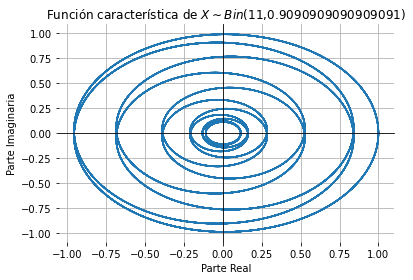

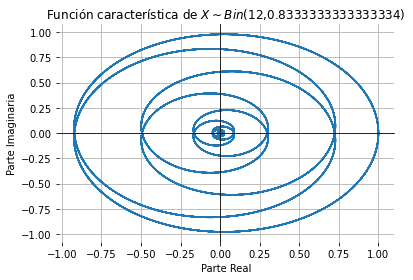

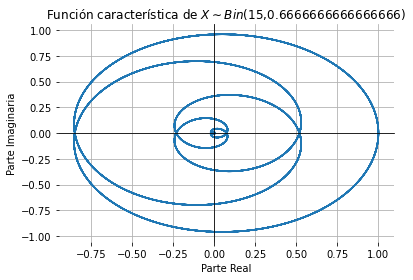

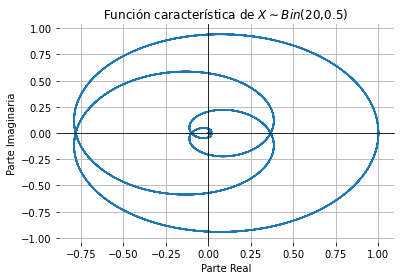

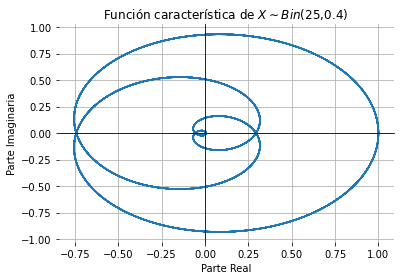

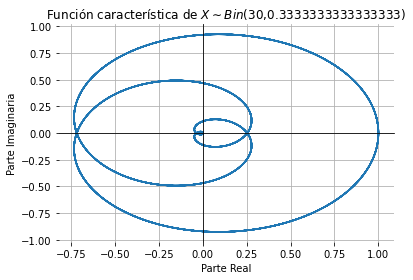

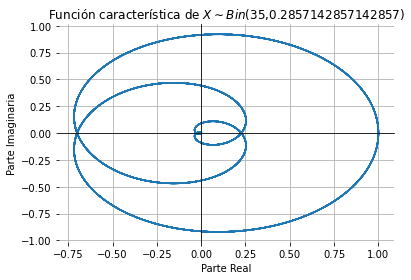

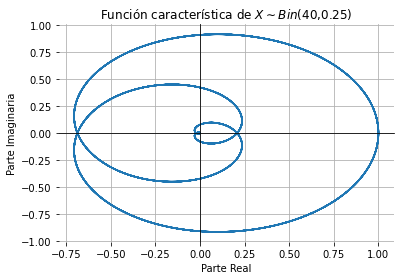

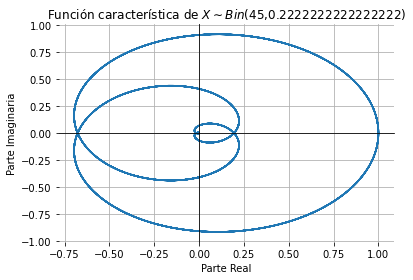

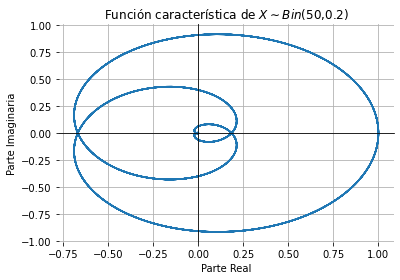

In [ ]:
#gráficas de las funciones características
for j in range(10):
    cfvals=lambdify(t,cf.subs([(p,ps[j]),(n,ns[j])]),'numpy')
    plot_cf(cfvals(intervalo), 
            titulo="Función característica de $X\sim Bin($"+str(ns[j])+","+str(ps[j])+")")

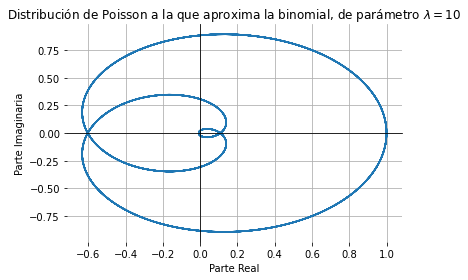

In [ ]:
#comparada con la distribución de poisson de parámetro lambda
res  = [cf_Poisson(t,l=mean) for t in intervalo]
plot_cf(res,titulo='Distribución de Poisson a la que aproxima la binomial, de parámetro $\lambda=$'+str(mean))

Podemos observar como, en efecto, las funciones características se asemejan visualmente cada vez más a la función característica de la distribución Poisson conforme el parámetro $n$ va creciendo, siempre y cuando el parámetro $p$ esté apropiadamente reescalado.